In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-20.csv')         # churn true:left service
                                                                                                                              #churn false:still using service

In [ ]:
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
churn.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

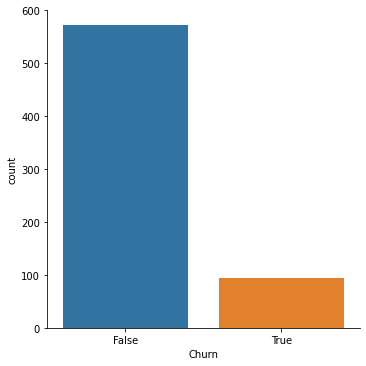

In [ ]:
sns.catplot(x = 'Churn',kind ='count',data =churn)

# **Data Preprocessing**

In [ ]:
#need to convert yes no into 0 & 1
#LabelEncoder is used for mapping text data to 0,1,2,3...
churn['International plan'].drop_duplicates()

0      No
47    Yes
Name: International plan, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(churn['International plan'].drop_duplicates())


LabelEncoder()

In [ ]:
churn['International plan'] = le.transform(churn['International plan'])

In [ ]:
churn['Voice mail plan'].drop_duplicates()

0     No
5    Yes
Name: Voice mail plan, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(churn['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [ ]:
churn['Voice mail plan'] = le.transform(churn['Voice mail plan'])

In [ ]:
churn

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


# **Correlation**

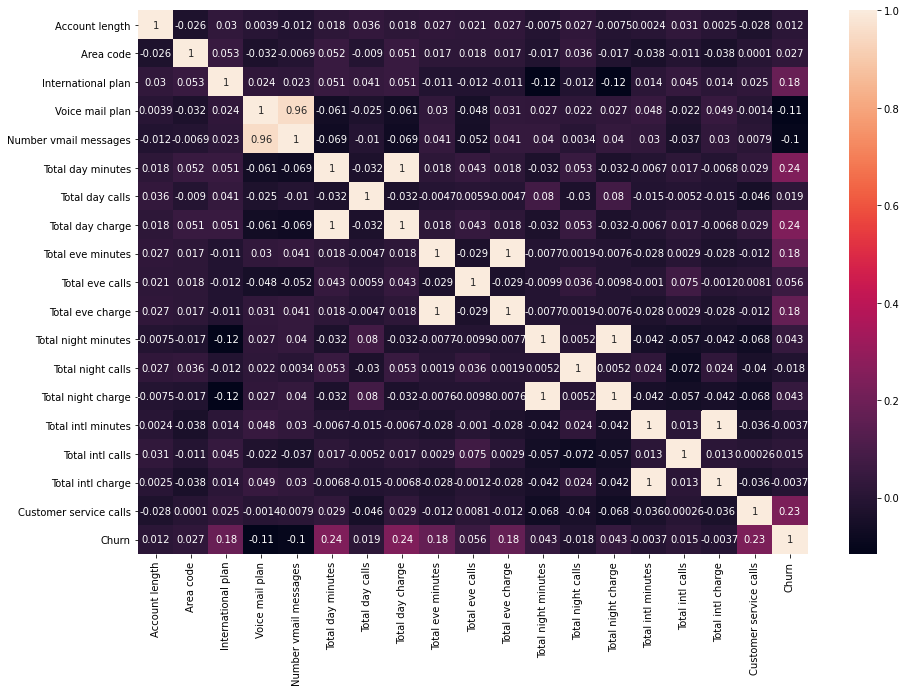

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(churn.corr(),annot=True,color = 'm')

# **Feature Selection**

In [ ]:
churn.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
X = churn.drop(['State','Churn','Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl minutes'],axis =1)

In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,0,184.5,97,351.6,80,215.8,90,4,2.35,1
1,65,415,0,0,129.1,137,228.5,83,208.8,111,6,3.43,4
2,161,415,0,0,332.9,67,317.8,97,160.6,128,9,1.46,4
3,111,415,0,0,110.4,103,137.3,102,189.6,105,6,2.08,2
4,49,510,0,0,119.3,117,215.1,109,178.7,90,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,1,137.1,88,155.7,125,247.6,94,7,3.11,2
663,106,408,0,1,83.6,131,203.9,131,229.5,73,3,2.19,1
664,60,415,0,0,193.9,118,85.0,110,210.1,134,8,3.56,3
665,159,415,0,0,169.8,114,197.7,105,193.7,82,4,3.13,1


In [ ]:
Y = churn['Churn']

# **Cross Validation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state = 3 )

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 9, random_state = 0)

In [ ]:
clf_tree.fit(X_train , Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
clf_tree.score(X_test , Y_test)

0.9402985074626866

In [ ]:
clf_tree.score(X_train, Y_train)

0.9943714821763602

# **Plotting Decision tree**

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
Dot_data = StringIO()
export_graphviz(clf_tree, out_file = Dot_data, feature_names=list(X.columns), filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(Dot_data.getvalue())

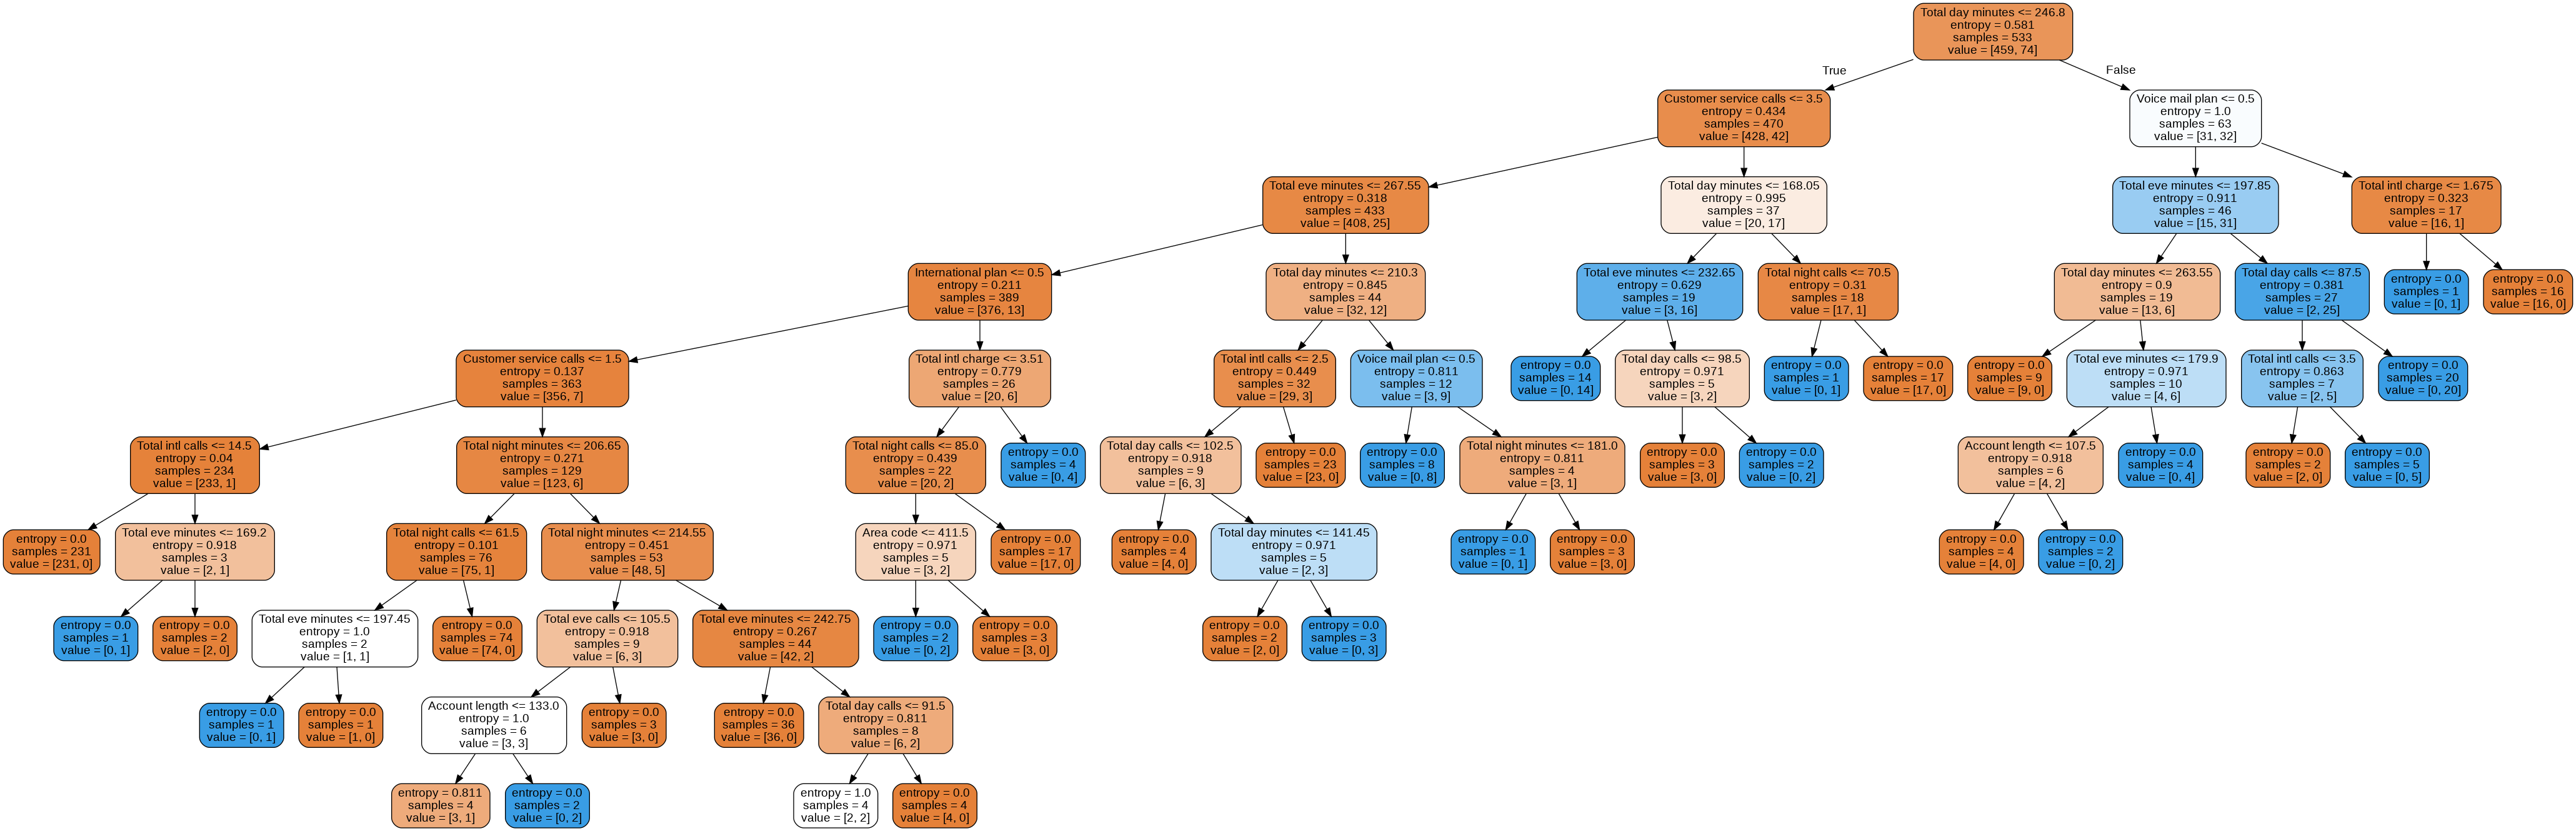

In [ ]:
# display png graph image
Image(graph.create_png())

In [ ]:
yhat = clf_tree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, yhat)


array([[112,   1],
       [  7,  14]])

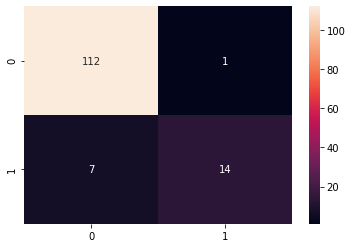

In [ ]:
sns.heatmap(confusion_matrix(Y_test, yhat), annot=True, fmt='0.0f')


In [ ]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

       False       0.94      0.99      0.97       113
        True       0.93      0.67      0.78        21

    accuracy                           0.94       134
   macro avg       0.94      0.83      0.87       134
weighted avg       0.94      0.94      0.94       134



# **Making Prediction**

In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,0,184.5,97,351.6,80,215.8,90,4,2.35,1
1,65,415,0,0,129.1,137,228.5,83,208.8,111,6,3.43,4
2,161,415,0,0,332.9,67,317.8,97,160.6,128,9,1.46,4
3,111,415,0,0,110.4,103,137.3,102,189.6,105,6,2.08,2
4,49,510,0,0,119.3,117,215.1,109,178.7,90,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,1,137.1,88,155.7,125,247.6,94,7,3.11,2
663,106,408,0,1,83.6,131,203.9,131,229.5,73,3,2.19,1
664,60,415,0,0,193.9,118,85.0,110,210.1,134,8,3.56,3
665,159,415,0,0,169.8,114,197.7,105,193.7,82,4,3.13,1


In [ ]:
new_data = [[117,	408,	0,	1,	284.5,	117,	351.6,	80,	215.8,	90,	4,	1.35,	4]]
clf_tree.predict(new_data)                                #took any data from X and made changes

array([ True])

In [ ]:
new_data1 = [[117,	408,	0,	1,	184.5,	117,	351.6,	80,	215.8,	90,	4,	2.35,	2]]
clf_tree.predict(new_data1)


array([False])

# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# n_estimators = n_trees (Default is 100),depth of each tree = max_depth = 9
clf_rf =RandomForestClassifier(bootstrap=True , max_depth=9 , n_estimators=200 ,random_state=1,criterion='entropy')

In [ ]:
clf_rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
clf_rf.score(X_test,Y_test)

0.9104477611940298

In [ ]:
yhat = clf_rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, yhat)


array([[113,   0],
       [ 13,   8]])

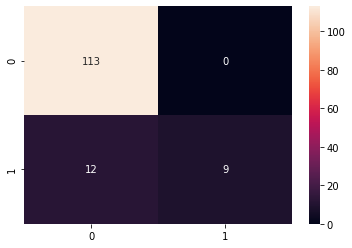

In [ ]:
sns.heatmap(confusion_matrix(Y_test, yhat), annot=True, fmt='0.0f')

# **Making Prediction(Testing model)**

In [ ]:
new_data = [[117,	408,	0,	1,	284.5,	117,	351.6,	80,	215.8,	90,	4,	1.35,	4]]      # here random forest is not giving correct result (true) as calculated from graph ,so in this case decision tree will be used
clf_rf.predict(new_data)                                                                 # in this manner we have to try and select correct algorithm

array([False])

In [ ]:
new_data1 = [[117,	408,	0,	1,	184.5,	117,	351.6,	80,	215.8,	90,	4,	2.35,	2]]
clf_rf.predict(new_data1)

array([False])